# Lab 5: EDA with Dimensionality Reduction
RJ Nowling

In this lab, we are going to explore the relationships between email messages.  We will need to first convert the text data into numeric features.  When done, we will have too many features to analyze each variable separately, so we'll apply dimensionality reduction techniques.

In [27]:
import glob
import json

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

## Part I: Load Data

Each email is stored in a separate JSON document.  Each email has five fields: category (ham or spam), to_address, from_address, subject, and body.  We'll need to load these into a single DataFrame.

```
{
  "category": "ham",
  "to_address": "debian-mirrors@lists.debian.org",
  "from_address": "Yan Morin <yan.morin@savoirfairelinux.com>",
  "subject": "Typo in /debian/README",
  "body": "Hi, i've just updated from the gulus and I check on other mirrors.\nIt seems there is a little typo in /debian/README file\n\nExample:\nhttp://gulus.usherbrooke.ca/debian/README\nftp://ftp.fr.debian.org/debian/README\n\n\"Testing, or lenny.  Access this release through dists/testing.  The\ncurrent tested development snapshot is named etch.  Packages which\nhave been tested in unstable and passed automated tests propogate to\nthis release.\"\n\netch should be replace by lenny like in the README.html\n\n\n\n-- \nYan Morin\nConsultant en logiciel libre\nyan.morin@savoirfairelinux.com\n514-994-1556\n\n\n-- \nTo UNSUBSCRIBE, email to debian-mirrors-REQUEST@lists.debian.org\nwith a subject of \"unsubscribe\". Trouble? Contact listmaster@lists.debian.org\n\n"
}
```

In [8]:
records = []
for flname in glob.glob("email_json/message_*.json"):
    with open(flname) as fl:
        email = json.load(fl)
        records.append(email)

print("Loaded", len(records), "emails")

Loaded 63542 emails


In [9]:
df = pd.DataFrame.from_dict(records)

df.head()

,category,to_address,from_address,subject,body
0,spam,smile@speedy.uwaterloo.ca,Pablo Timmons <SophiRosemary4926@yahoo.com>,Software Compatibility....ain't it great?,\n\n\n\n\n\n\n\n\n\n\n\n\nLove works a differe...
1,spam,"""gnitpick"" <gnitpick@speedy.uwaterloo.ca>","""Inez Tanner"" <ocuseethed@executiveemail.com>",At which bookshelves,This one will explode\nSpecial Situation Alert...
2,spam,catchall@flax9.uwaterloo.ca,"""Joar Moree"" <Joar@arslanzade.com>",It's just like Raistlin described to me once.,"\n\n\n\n\n\nSee "" String Instructions"" on page..."
3,spam,the00@plg2.math.uwaterloo.ca,bass Elkins <Gailk@waydelivery.com>,Have in mixture,\n\n\n\n\n\n\n\neasy to think of all the possi...
4,spam,manager@speedy.uwaterloo.ca,Works Fast <kmamie@netcityhk.com>,Benefits of Cialis,\n\n\n\n\n\nCialis will boost up your erection...


## Part II: Extract Features

We want to create numerical features from the message bodies.  We'll use Scikit Learn's CountVectorizer for this.  Each column in the feature matrix will store the counts for a single word.

In [34]:
vec = CountVectorizer(binary=True)

features = vec.fit_transform(df["body"])

print(type(features), features.shape, features.nnz)

<class 'scipy.sparse.csr.csr_matrix'> (63542, 300984) 6885706


In [35]:
print(list(vec.vocabulary_)[:10])

['love', 'works', 'different', 'way', 'in', 'minds', 'the', 'fool', 'it', 'enlightens']


In [36]:
love_idx = vec.vocabulary_["love"]
works_idx = vec.vocabulary_["works"]
different_idx = vec.vocabulary_["different"]

print(love_idx, works_idx, different_idx)

183355 289715 125499


In [37]:
print(features[:, love_idx])

  (0, 0)	1
  (10, 0)	1
  (73, 0)	1
  (80, 0)	1
  (83, 0)	1
  (138, 0)	1
  (146, 0)	1
  (162, 0)	1
  (165, 0)	1
  (256, 0)	1
  (271, 0)	1
  (279, 0)	1
  (319, 0)	1
  (338, 0)	1
  (345, 0)	1
  (357, 0)	1
  (360, 0)	1
  (436, 0)	1
  (446, 0)	1
  (471, 0)	1
  (476, 0)	1
  (488, 0)	1
  (502, 0)	1
  (517, 0)	1
  (536, 0)	1
  :	:
  (62725, 0)	1
  (62730, 0)	1
  (62732, 0)	1
  (62774, 0)	1
  (62780, 0)	1
  (62791, 0)	1
  (62812, 0)	1
  (62822, 0)	1
  (62953, 0)	1
  (62954, 0)	1
  (62973, 0)	1
  (62993, 0)	1
  (63001, 0)	1
  (63002, 0)	1
  (63012, 0)	1
  (63043, 0)	1
  (63088, 0)	1
  (63143, 0)	1
  (63163, 0)	1
  (63390, 0)	1
  (63445, 0)	1
  (63457, 0)	1
  (63490, 0)	1
  (63509, 0)	1
  (63522, 0)	1


In [38]:
print(features[:, works_idx])

  (0, 0)	1
  (4, 0)	1
  (60, 0)	1
  (67, 0)	1
  (73, 0)	1
  (88, 0)	1
  (119, 0)	1
  (143, 0)	1
  (166, 0)	1
  (186, 0)	1
  (191, 0)	1
  (193, 0)	1
  (207, 0)	1
  (308, 0)	1
  (314, 0)	1
  (332, 0)	1
  (364, 0)	1
  (409, 0)	1
  (411, 0)	1
  (415, 0)	1
  (432, 0)	1
  (460, 0)	1
  (476, 0)	1
  (490, 0)	1
  (503, 0)	1
  :	:
  (63037, 0)	1
  (63059, 0)	1
  (63085, 0)	1
  (63116, 0)	1
  (63152, 0)	1
  (63211, 0)	1
  (63225, 0)	1
  (63241, 0)	1
  (63249, 0)	1
  (63302, 0)	1
  (63327, 0)	1
  (63341, 0)	1
  (63357, 0)	1
  (63374, 0)	1
  (63387, 0)	1
  (63390, 0)	1
  (63407, 0)	1
  (63411, 0)	1
  (63428, 0)	1
  (63442, 0)	1
  (63466, 0)	1
  (63473, 0)	1
  (63477, 0)	1
  (63491, 0)	1
  (63504, 0)	1


In [24]:
print(features[:, different_idx])

  (0, 0)	2
  (3, 0)	1
  (19, 0)	1
  (26, 0)	1
  (46, 0)	1
  (67, 0)	1
  (73, 0)	1
  (79, 0)	2
  (125, 0)	1
  (143, 0)	1
  (144, 0)	1
  (163, 0)	1
  (165, 0)	1
  (175, 0)	1
  (181, 0)	1
  (337, 0)	1
  (387, 0)	2
  (409, 0)	1
  (423, 0)	1
  (433, 0)	1
  (489, 0)	1
  (503, 0)	1
  (515, 0)	1
  (518, 0)	1
  (525, 0)	1
  :	:
  (63105, 0)	1
  (63107, 0)	1
  (63118, 0)	1
  (63133, 0)	1
  (63151, 0)	1
  (63191, 0)	2
  (63215, 0)	1
  (63221, 0)	1
  (63222, 0)	1
  (63267, 0)	1
  (63276, 0)	1
  (63287, 0)	1
  (63318, 0)	1
  (63328, 0)	2
  (63353, 0)	1
  (63366, 0)	1
  (63371, 0)	1
  (63390, 0)	2
  (63394, 0)	5
  (63413, 0)	2
  (63416, 0)	1
  (63438, 0)	2
  (63455, 0)	1
  (63470, 0)	1
  (63505, 0)	3


## Part III: Dimensionality Reduction with SVD

300,984 variables is way too many to look at by hand.  We'll use SVD to reduce the dimensionality of the matrix.  Like PCA, SVD uses correlation between variables to group them and created a smaller set of variables.

In [39]:
svd = TruncatedSVD(n_components=10)
proj = svd.fit_transform(features)

Text(0, 0.5, 'Explained Varianace Ratio')

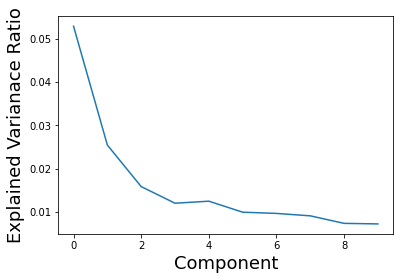

In [42]:
plt.plot(svd.explained_variance_ratio_)
plt.xlabel("Component", fontsize=18)
plt.ylabel("Explained Varianace Ratio", fontsize=18)

The first two components (indices 0 and 1) capture most of the variation.  We will visualize the relationships between these two components.

## Part IV: Visualization

Text(0, 0.5, 'Component 1')

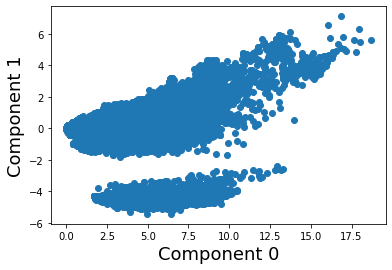

In [43]:
plt.scatter(proj[:, 0], proj[:, 1])
plt.xlabel("Component 0", fontsize=18)
plt.ylabel("Component 1", fontsize=18)

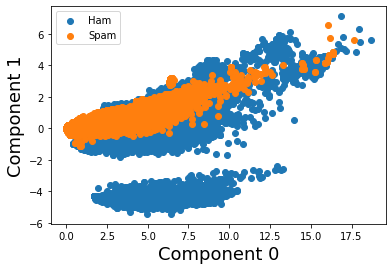

In [44]:
mask = df["category"] == "ham"
plt.scatter(proj[mask, 0], proj[mask, 1], label="Ham")
mask = df["category"] == "spam"
plt.scatter(proj[mask, 0], proj[mask, 1], label="Spam")
plt.xlabel("Component 0", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.legend()

## Reflection Questions

1. See JSON example at top of notebook
1. Dense size: 63542 * 300984 * 4 = 76500501312 bytes = 71 GB
1. Sparse size: (4 + 4) * 6885706 + 4 * 63542 = 55339816 bytes = 0.05 GB
1. Sparsity ratio: 100 * 6885706 / (63542 * 300984) = 3.6%
1. Only 3.6% of the entries in the matrix are nonzero.  Storing all of the entries using a dense matrix or array would require 71 GB of memory.  The sparse matrix only requires 0.05 GB of RAM -- significantly less!  The sparse matrix is the better choice from the standpoint of memory usage.
1. Both scatters plot shows two clusters.  I originally thought these might correspond to spam vs ham messages.  When I colored the points, I saw that all of the spam occurred in one cluster but that not all points in that cluster are spam.  SVD is finding some inherent structure in the data but we don't know what it is yet.